In [16]:
import json

In [17]:
import pandas as pd
import numpy as np

In [18]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
#returns shape of news and oped
def oped_v_news(df):
#    df.type_of_matrial.hist()
    news = sum(df.type_of_material == "News")
    oped = sum(df.type_of_material == "Op-Ed")
    print(f'News: {news} Oped: {oped}, {round(oped/(oped+news), 2)} of total')

In [84]:
df = pd.read_csv('data/archive/raw_2019.csv', index_col = '_id', low_memory=False)

In [85]:
df2019 = df.copy()

In [88]:
oped_v_news(df2019)

News: 37609 Oped: 4139, 0.1 of total


In [74]:
df2019.columns

Index(['Unnamed: 0', 'abstract', 'web_url', 'snippet', 'lead_paragraph',
       'print_section', 'print_page', 'source', 'multimedia', 'headline',
       'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name',
       'byline', 'type_of_material', 'word_count', 'uri', 'subsection_name',
       'text'],
      dtype='object')

In [75]:
df2019 = df2019.drop(labels='Unnamed: 0', axis=1)

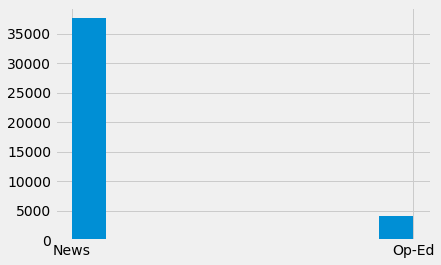

In [76]:
df2019.type_of_material.hist()

News: 37609 Oped: 4139 0.09914247389096484


# only keyword "United States Politics and Government"

In [29]:
def return_rank1(row):
    list_dict = eval(row.keywords)
    for (dic) in (list_dict):
        if dic.get("rank") == 1:
            return (dic.get('value'))

In [30]:
def return_pol_gov(row):
    list_dict = eval(row.keywords)
    for dic in list_dict:
        if dic.get('value') == 'United States Politics and Government':
            return True

In [31]:
df2019['United States Politics and Government'] = df2019.apply(return_pol_gov, axis=1)

In [32]:
df2019['United States Politics and Government'].value_counts()

True    6053
Name: United States Politics and Government, dtype: int64

In [17]:
us_gov_pol = df2019[df2019['United States Politics and Government'] == True]

In [18]:
oped_v_news(us_gov_pol)

news shape:(4490, 21), oped shape:(1329, 21), ratio: 0.2959910913140312


# figuring out tags

In [19]:
oped_us_gov_pol = us_gov_pol[us_gov_pol['type_of_material'] == 'Op-Ed']

In [20]:
oped_us_gov_pol.iloc[110]

abstract                                 The Trump administration is continuing a bad p...
web_url                                  https://www.nytimes.com/2019/06/30/opinion/imm...
snippet                                  The Trump administration is continuing a bad p...
lead_paragraph                           Since the 2016 election, Congress has woken up...
print_section                                                                          NaN
print_page                                                                             NaN
source                                                                  The New York Times
multimedia                               [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline                                 {'main': 'Stop Collecting Immigrants’ Social M...
keywords                                 [{'name': 'organizations', 'value': 'Homeland ...
pub_date                                                          2019-06-30T19:00:06+0000

In [21]:
follow = "Follow @privacyproject on Twitter and The New York Times Opinion Section on Facebook and Instagram."

In [22]:
like_other = "Like other media companies, The Times collects data on its visitors when they read stories like this one. For more detail please see our privacy policy and our publisher's description of The Times's practices and continued steps to increase transparency and protections."

In [23]:
us_gov_pol.shape

(5819, 21)

In [24]:
us_gov_pol = us_gov_pol.dropna(subset=['text'])#, inplace=True)

In [25]:
us_gov_pol.shape

(5816, 21)

In [26]:
for text in us_gov_pol.text:
    text.replace(follow, "")
    text.replace(like_other,"")

In [27]:
us_gov_pol.shape

(5816, 21)

# print_section or print_page isna()

In [30]:
us_gov_pol.shape

(5816, 21)

In [42]:
us_gov_isna = us_gov_pol[~us_gov_pol.print_page.isna()]

In [43]:
oped_v_news(us_gov_isna)

news shape:(3571, 21), oped shape:(721, 21), ratio: 0.2019042285074209


In [49]:
us_gov_isna.shape

(4292, 21)

In [44]:
#us_gov_isna.to_csv('../data/us_gov_pol.csv')

In [55]:
df2019 = df.copy()

In [56]:
df2019.shape

(41748, 21)

In [57]:
isna = df2019[~df2019.print_page.isna()]

In [58]:
isna = isna[~isna.text.isna()]

In [59]:
oped_v_news(isna)

news shape:(28194, 21), oped shape:(2038, 21), ratio: 0.07228488330850535


In [60]:
#isna.to_csv('../data/only_printed_2019.csv')

# filter only printed articles

In [1]:
import os
import glob
import pandas as pd

#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
df2020 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2020.csv'
df2019 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2019.csv'

#combine print, type, text columns in the list
def printed(file):
    print_cols = ['_id','print_page','pub_date','keywords','type_of_material','text']    
    df = pd.read_csv(file, usecols=print_cols, index_col='_id', low_memory=False)
    df = df[df.print_page.isna() == False]
    return df
    #[printed(f) for f in all_filenames]


In [9]:
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

# #extract year
# year = all_filenames[0][-8:-4]

# #export to csv
# combined_csv.to_csv(f'raw_{year}.csv', index=False, encoding='utf-8-sig')

In [4]:
printed_2020 = printed(df2020)


In [ ]:
printed_2019 = printed(df2019)

In [7]:
print(printed_2020.shape)
print(printed_2019.shape)

(27801, 5)
(30255, 5)


In [12]:
df = pd.concat([printed_2019, printed_2020])

In [15]:
df2019.type_of_material.hist()

AttributeError: 'str' object has no attribute 'type_of_material'

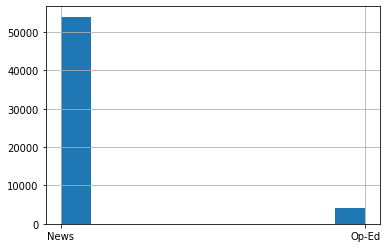

In [14]:
df.type_of_material.hist()